In [2]:
!pip3 install torch

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision.datasets as dsets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader 
from torch.utils.data import TensorDataset

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

import numpy as np
import pandas as pd
from scipy.stats import norm
import matplotlib.pyplot as plt
import random
import math

# Q1 gradient descent로 simple linear regression 추정하기

예제로 사용할 데이터 생성하기

$ y_i = \beta_0 + \beta_1 \times x_i + \epsilon_i \quad \epsilon_i \sim  iid N(0, 1)$ 

$ \beta_0 = 5, \beta_1 = 2$라는 모형을 따르는 데이터를 생성해준다. 

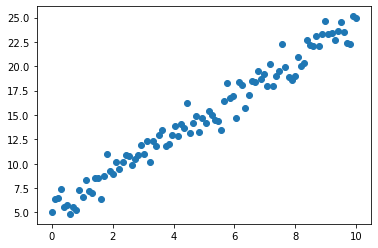

In [3]:
x_train_np = np.linspace(0, 10, 100).reshape(-1, 1)
y_train_np = 2 *  x_train_np + 5 + norm.rvs(0, 1, size = len(x_train_np)).reshape(-1, 1)

plt.scatter(x_train_np, y_train_np)
plt.show()

$ \hat{y_i} = \beta_0 + \beta_1 \times x_i $

$ \hat{y_i} = bias + weight \times x_i $

gradient descent를 사용해 bias와 weight를 학습해보자. 

1) 추정된 bias와 weight의 결과값은 얼마인가? 그래프를 그려 실제 회귀식에 가깝게 추정되었는지를 확인해보자. 

In [4]:
x_train = torch.FloatTensor(x_train_np)
y_train = torch.FloatTensor(y_train_np)

W = torch.zeros(1, requires_grad = True) # Weight
b = torch.zeros(1, requires_grad = True) # bias

optimizer = optim.SGD([W, b], lr = 0.01)

n_epochs = 1000
for epoch in range(n_epochs + 1):

  # H(x) 계산
  hypothesis = x_train * W + b # your code here # 답: x_train * W + b
  
  # cost 계산: MSE
  cost = torch.mean((hypothesis - y_train)**2) # your code here # 답: torch.mean((hypothesis - y_train)**2)

  # cost로 H(x) 개선
  # your code here
  # 답 ; optimizer.zero_grad()
  # 답 ; cost.backward()
  # 답 ; optimizer.step()
  optimizer.zero_grad()
  cost.backward()
  optimizer.step()

  if epoch % 100 == 0:
      print('Epoch {:4d}/{} W: {:.3f}, b: {:.3f} Cost: {:.6f}'.format(
          epoch, n_epochs, W.item(), b.item(), cost.item()
      ))

Epoch    0/1000 W: 1.818, b: 0.298 Cost: 254.686172
Epoch  100/1000 W: 2.368, b: 2.332 Cost: 3.300807
Epoch  200/1000 W: 2.193, b: 3.492 Cost: 1.885918
Epoch  300/1000 W: 2.087, b: 4.197 Cost: 1.362941
Epoch  400/1000 W: 2.023, b: 4.626 Cost: 1.169636
Epoch  500/1000 W: 1.984, b: 4.887 Cost: 1.098185
Epoch  600/1000 W: 1.960, b: 5.045 Cost: 1.071775
Epoch  700/1000 W: 1.945, b: 5.142 Cost: 1.062014
Epoch  800/1000 W: 1.937, b: 5.200 Cost: 1.058405
Epoch  900/1000 W: 1.931, b: 5.236 Cost: 1.057072
Epoch 1000/1000 W: 1.928, b: 5.257 Cost: 1.056579


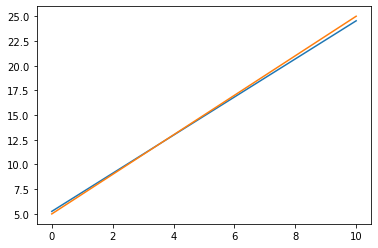

In [5]:
y_pred = W * x_train + b # 추정한 회귀식
y_real = 2 * x_train + 5 # 실제 회귀식

plt.plot(x_train_np, y_pred.detach().numpy())
plt.plot(x_train_np, y_real.detach().numpy())

2) learning rate를 0.03으로 조정해보자. 어떠한 문제가 발생하는가?

답: cost(MSE)가 최소가 되는 점을 찾지 못하고 발산한다. 

In [6]:
# 직접 W와 b를 정의하지 않고, nn.Module을 사용해 손쉽게 선형 모델을 생성할 수 있습니다. 
# 입출력값의 차원을 생각해 in_features와 out_features의 값을 적절하게 지정해주세요

in_features = 1 # your code here # 답: 1
out_features = 1 # your code here # 답: 1

model = nn.Linear(in_features = in_features, out_features = out_features, bias = True)

optimizer = optim.SGD(model.parameters(), lr = 0.03)

nb_epochs = 1000
for epoch in range(nb_epochs + 1):

    # H(x) 계산
    hypothesis = model(x_train)
    
    # cost 계산
    cost = F.mse_loss(hypothesis, y_train)

    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    # 100번마다 로그 출력
    if epoch % 100 == 0:
        params = list(model.parameters())
        W = params[0].item()
        b = params[1].item()
        print('Epoch {:4d}/{} W: {:.3f}, b: {:.3f} Cost: {:.6f}'.format(
            epoch, nb_epochs, W, b, cost.item()
        ))

Epoch    0/1000 W: 4.883, b: 1.534 Cost: 178.012131
Epoch  100/1000 W: 507.213, b: 80.329 Cost: 8027540.000000
Epoch  200/1000 W: 108962.617, b: 16388.445 Cost: 373487828992.000000
Epoch  300/1000 W: 23502656.000, b: 3533870.500 Cost: 17376847121612800.000000
Epoch  400/1000 W: 5069473280.000, b: 762247616.000 Cost: 808467557388344360960.000000
Epoch  500/1000 W: 1093478907904.000, b: 164415684608.000 Cost: 37614709723840962426306560.000000
Epoch  600/1000 W: 235861367062528.000, b: 35464140554240.000 Cost: 1750050234533511754852117512192.000000
Epoch  700/1000 W: 50874819629023232.000, b: 7649540765122560.000 Cost: 81422153742369502771705469005201408.000000
Epoch  800/1000 W: 10973603233250934784.000, b: 1649993943972052992.000 Cost: inf
Epoch  900/1000 W: 2366991759054223704064.000, b: 355901534521324994560.000 Cost: inf
Epoch 1000/1000 W: 510556264306785275346944.000, b: 76767332427442434342912.000 Cost: inf


3) learning rate를 0.00000001로 조정해보자. 어떠한 문제가 발생하는가?

답: cost가 최소가 되는 점을 찾기까지 시간이 오래걸린다. epoch수를 늘리면 찾을수도 있지만 비효율적이다. 

In [7]:
W = torch.zeros(1, requires_grad = True) # Weight
b = torch.zeros(1, requires_grad = True) # bias

optimizer = optim.SGD([W, b], lr = 0.00000001)

n_epochs = 1000
for epoch in range(n_epochs + 1):

  # H(x) 계산
  hypothesis = x_train * W + b 
  
  # cost 계산: MSE
  cost = torch.mean((hypothesis - y_train)**2) 

  # cost로 H(x) 개선
  optimizer.zero_grad()
  cost.backward()
  optimizer.step()

  if epoch % 100 == 0:
      print('Epoch {:4d}/{} W: {:.3f}, b: {:.3f} Cost: {:.6f}'.format(
          epoch, nb_epochs, W.item(), b.item(), cost.item()
      ))

Epoch    0/1000 W: 0.000, b: 0.000 Cost: 254.686172
Epoch  100/1000 W: 0.000, b: 0.000 Cost: 254.652252
Epoch  200/1000 W: 0.000, b: 0.000 Cost: 254.618347
Epoch  300/1000 W: 0.001, b: 0.000 Cost: 254.584427
Epoch  400/1000 W: 0.001, b: 0.000 Cost: 254.550507
Epoch  500/1000 W: 0.001, b: 0.000 Cost: 254.516602
Epoch  600/1000 W: 0.001, b: 0.000 Cost: 254.482727
Epoch  700/1000 W: 0.001, b: 0.000 Cost: 254.448822
Epoch  800/1000 W: 0.001, b: 0.000 Cost: 254.414917
Epoch  900/1000 W: 0.002, b: 0.000 Cost: 254.381042
Epoch 1000/1000 W: 0.002, b: 0.000 Cost: 254.347168


# Q2. train set and test set - MNIST

MNIST dataset을 불러온다. 

In [8]:
mnist_train = dsets.MNIST(root='MNIST_data/',
                          train=True,
                          transform=transforms.ToTensor(),
                          download=True)

mnist_test = dsets.MNIST(root='MNIST_data/',
                         train=False,
                         transform=transforms.ToTensor(),
                         download=True)

data_loader = DataLoader(dataset = mnist_train,
                         batch_size = 100, 
                         shuffle = True
                         )

Using downloaded and verified file: MNIST_data/MNIST\raw\train-images-idx3-ubyte.gz
Extracting MNIST_data/MNIST\raw\train-images-idx3-ubyte.gz to MNIST_data/MNIST\raw

Using downloaded and verified file: MNIST_data/MNIST\raw\train-labels-idx1-ubyte.gz
Extracting MNIST_data/MNIST\raw\train-labels-idx1-ubyte.gz to MNIST_data/MNIST\raw



1649664it [00:06, 260085.96it/s]                             


Extracting MNIST_data/MNIST\raw\t10k-images-idx3-ubyte.gz to MNIST_data/MNIST\raw



5120it [00:00, 5310295.87it/s]          

Extracting MNIST_data/MNIST\raw\t10k-labels-idx1-ubyte.gz to MNIST_data/MNIST\raw



1) epoch 수를 15로 설정하여 trainset을 훈련시켜보자. 

그 후 훈련시킨 모델로 testset에 대한 평가를 진행해보자. 

In [18]:
# train model with train sets

# 입출력값의 차원을 생각해 in_features와 out_features의 값을 적절하게 지정해주세요

in_features = 784 # your code here # 답: 28 x 28 = 784
out_features = 10 # your code here # 답: 10
linear = torch.nn.Linear(in_features = in_features, out_features=out_features, bias = True)

criterion = torch.nn.CrossEntropyLoss()    # Softmax is internally computed.
optimizer = torch.optim.SGD(linear.parameters(), lr=0.1)

training_epochs = 15

for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = len(data_loader)

    for X, Y in data_loader:
        # reshape input image into [batch_size by 784]
        # label is not one-hot encoded
        X = X.view(-1, 28 * 28)
        Y = Y

        # H(x) 계산
        hypothesis = linear(X)

        # cost 계산
        cost = criterion(hypothesis, Y)

        #cost로 H(x) 개선
        optimizer.zero_grad()
        cost.backward()
        optimizer.step()

        avg_cost += cost / total_batch

    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))

Epoch: 0001 cost = 0.534241617
Epoch: 0002 cost = 0.359104574
Epoch: 0003 cost = 0.331023484
Epoch: 0004 cost = 0.316324890
Epoch: 0005 cost = 0.306906521
Epoch: 0006 cost = 0.299931347
Epoch: 0007 cost = 0.294765770
Epoch: 0008 cost = 0.290578693
Epoch: 0009 cost = 0.287219167
Epoch: 0010 cost = 0.284401357
Epoch: 0011 cost = 0.281939358
Epoch: 0012 cost = 0.279717922
Epoch: 0013 cost = 0.277725577
Epoch: 0014 cost = 0.275916874
Epoch: 0015 cost = 0.274141341


In [19]:
# Test the model using test sets
with torch.no_grad(): # torch.no_grad()를 사용하는 이유를 간단하게 설명해봅시다. 

    X_test = mnist_test.test_data.view(-1, 28 * 28).float()
    Y_test = mnist_test.test_labels

    prediction = linear(X_test)
    correct_prediction = torch.argmax(prediction, 1) == Y_test
    accuracy = correct_prediction.float().mean()
    print('Accuracy:', accuracy.item())
    print('cost:', cost.item())

Accuracy: 0.888700008392334
cost: 0.3150535523891449


2) epoch 수를 30으로 설정하여 trainset을 훈련시켜보자. 

그 후 훈련시킨 모델로 testset에 대한 평가를 진행해보자. 

어떠한 문제가 발생하는가?

In [ ]:
linear = torch.nn.Linear(784, 10, bias = True)
criterion = torch.nn.CrossEntropyLoss()   
optimizer = torch.optim.SGD(linear.parameters(), lr=0.1)

training_epochs = 30

for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = len(data_loader)

    for X, Y in data_loader:
        X = X.view(-1, 28 * 28)
        Y = Y

        # H(x) 계산
        hypothesis = linear(X)

        # cost 계산
        cost = criterion(hypothesis, Y)

        #cost로 H(x) 개선
        optimizer.zero_grad()
        cost.backward()
        optimizer.step()

        avg_cost += cost / total_batch

    if epoch % 5 == 0:
      print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))

Epoch: 0001 cost = 0.536900043
Epoch: 0006 cost = 0.300006479
Epoch: 0011 cost = 0.281852454
Epoch: 0016 cost = 0.272889793
Epoch: 0021 cost = 0.267339379
Epoch: 0026 cost = 0.263351321


In [ ]:
# Test the model using test sets
with torch.no_grad():
    X_test = mnist_test.test_data.view(-1, 28 * 28).float()
    Y_test = mnist_test.test_labels

    prediction = linear(X_test)
    correct_prediction = torch.argmax(prediction, 1) == Y_test
    accuracy = correct_prediction.float().mean()
    
    print('Accuracy:', accuracy.item())
    print('cost:', cost.item())

Accuracy: 0.8715000152587891
cost: 0.14322830736637115


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:67: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:57: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


# Q3. XOR problem with multilayer perceptron



In [11]:
X = torch.FloatTensor([[0, 0], [0, 1], [1, 0], [1, 1]])
Y = torch.FloatTensor([[0], [1], [0], [1]])

# 입출력값의 차원을 고려하여 아래 빈칸을 적절하게 채워주세요
linear1 = torch.nn.Linear(2, 2, bias = True) # 2. 2
linear2 = torch.nn.Linear(2, 1, bias = True) # 2, 1
sigmoid = torch.nn.Sigmoid()

# 딥러닝의 구조를 고려하여 multi perceptron 모델을 적절하게 생성하세요. 
# nn.Sequential 함수를 사용하세요
model = torch.nn.Sequential(linear1, sigmoid, linear2, sigmoid)
# your code here # 답: torch.nn.Sequential(linear1, sigmoid, linear2, sigmoid)

# 이 예제에서 cross entropy 대신 BCE를 사용하는 이유를 간단하게 설명하세요
criterion = torch.nn.BCELoss() 
optimizer = torch.optim.SGD(model.parameters(), lr = 1)

for step in range(301):
  hypothesis = model(X)
  cost = criterion(hypothesis, Y)

  optimizer.zero_grad()
  cost.backward()
  optimizer.step()
  if step%50 == 0:
    print(step, cost.item())

0 0.718897819519043
50 0.4731334447860718
100 0.08824232220649719
150 0.03638290613889694
200 0.021740451455116272
250 0.015231644734740257
300 0.011627869680523872


##Q4. Sine Function Approximation using the Legendre *Polynomial*

n = 3일때 르장드르 다항식은 다음과 같다. \
$ P_{3} = \frac{1}{2} (5x^{3} -3x) $ \
이 함수를 사용하여, sine함수를 근사하도록 학습하려고 한다.


1) Forward, Backward 함수를 직접 작성하여보자.

In [12]:
# 이 클래스에서, forward, backward 함수가 하는 기능이 무엇인지 설명해주세요.

class Legendre3Function(torch.autograd.Function):
    @staticmethod
    def forward(ctx, input):
        ctx.save_for_backward(input)
        return 0.5 * (5 * input ** 3 - 3 * input)

    @staticmethod
    def backward(ctx, grad_output):
        input, = ctx.saved_tensors
        return grad_output * 1.5 * (5 * input ** 2 - 1)
        # Hint : Legendre Polynomial의 differential
        # 답 : 1.5 * (5 * input ** 2 - 1)

2) 학습을 위한 parameter와 Data를 세팅해보자.
   우리가 사용하려는 모델은 다음과 같다.\
   $ y = a + b * P_{3}(c + d * x) $

In [20]:
dtype = torch.float
device = torch.device("cpu")

x = torch.linspace(-math.pi, math.pi, 2000, device=device, dtype=dtype)
y = torch.sin(x) # Target function to approximate

# Setting requires_grad=True indicates that we want to compute gradients with
# respect to these Tensors during the backward pass.
a = torch.full((), 0.0, device=device, dtype=dtype, requires_grad=True)
b = torch.full((), -1.0, device=device, dtype=dtype, requires_grad=True)
c = torch.full((), 0.0, device=device, dtype=dtype, requires_grad=True)
d = torch.full((), 0.3, device=device, dtype=dtype, requires_grad=True)

3) 1)에서 정의한 forward, backward 함수를 사용하여,
   딥러닝 학습 과정을 직접 작성해보자.\
   \
   Learning rate의 경우, 5e-2, 5e-4, 5e-6, 5e-8 중,
   가장 적절한 Learning rate를 찾아보자. \
   적절한 learning rate보다 learning rate가 크거나 작을 때,
   어떤 현상이 발생하는지 살펴보자.

In [21]:
# [5e-2, 5e-4, 5e-6, 5e-8] 중 적절한 learning rate를 찾아주세요.
# 적절한 learning rate보다 learning rate가 크거나 작을 때, 어떤 차이가 생기는지
# 말씀해주세요.
learning_rate = 5e-6
# 답 : 5e-6

# epoch = 2000
for t in range(2000):
    P3 = Legendre3Function.apply

    # Forward pass: predict y.
    # P3 using our custom backward function.
    y_pred = a + b * P3(c + d * x)
    # 답 : a + b * P3(c + d * x)

    # Compute and print MSE loss
    loss = (y_pred - y).pow(2).sum().mean()
    # 답 : loss = (y_pred - y).pow(2).sum().mean()
    if t % 100 == 0:
        print(t, loss.item())

    # Use autograd to compute the backward pass.
    loss.backward()
    'your code here'
    # 답 : loss.backward()

    # Update weights using gradient descent
    # Hint : use a, b, c, d, learning_rate, a.grad, b.grad, c.grad, d.grad
    with torch.no_grad():
        'your code here'
        a -= learning_rate * a.grad
        b -= learning_rate * b.grad
        c -= learning_rate * c.grad
        d -= learning_rate * d.grad

        # 답 : a -= learning_rate * a.grad
        # b -= learning_rate * b.grad
        # c -= learning_rate * c.grad
        # d -= learning_rate * d.grad

        # Manually zero the gradients after updating weights
        'your code here'
        a.grad = a.grad.zero_()
        b.grad = b.grad.zero_()
        c.grad = c.grad.zero_()
        d.grad = d.grad.zero_()
        # 답 : a.grad = a.grad.zero_()
        # b.grad = b.grad.zero_()
        # c.grad = c.grad.zero_()
        # d.grad = d.grad.zero_()

print(f'Result: y = {a.item()} + {b.item()} * P3({c.item()} + {d.item()} x)')

0 461.902587890625
100 209.16842651367188
200 144.1292266845703
300 100.34451293945312
400 70.7933349609375
500 50.81488037109375
600 37.29232406616211
700 28.13178253173828
800 21.922277450561523
900 17.71118927001953
1000 14.854462623596191
1100 12.915864944458008
1200 11.600122451782227
1300 10.70693302154541
1400 10.100505828857422
1500 9.68873119354248
1600 9.409082412719727
1700 9.219189643859863
1800 9.090229034423828
1900 9.002641677856445
Result: y = -5.423830273798558e-09 + -2.208526849746704 * P3(1.3320399228078372e-09 + 0.2554861009120941 x)


##Q5. Different Basis Function for approximating sine function

이번에는 ReLu function을 사용하여 sine함수를 학습해보려 한다. \
ReLu function을 사용했을 때에도, 학습이 잘 되는지 살펴보자.

In [ ]:
class ReLuFunction(torch.autograd.Function):
    @staticmethod
    def forward(ctx, input):
        ctx.save_for_backward(input)
        return input.clamp(min=0)
        # 답 : input.clamp(min=0)

    @staticmethod
    def backward(ctx, grad_output):
        input, = ctx.saved_tensors
        grad_input = grad_output.clone()
        grad_input[grad_input < 0] = 0
        # Hint : reLu function의 도함수의 형태를 반영하면 됩니다.
        # 답 : grad_input[grad_input < 0] = 0
        return grad_input

dtype = torch.float
device = torch.device("cpu")

x = torch.linspace(-math.pi, math.pi, 2000, device=device, dtype=dtype)
y = torch.sin(x)
# 답 : torch.sin(x)

# Our model : y = a + b * ReLu(c + d * x).
# Setting requires_grad=True indicates that we want to compute gradients with
# respect to these Tensors during the backward pass.
a = torch.full((), 0.0, device=device, dtype=dtype, requires_grad=True)
b = torch.full((), 1.0, device=device, dtype=dtype, requires_grad=True)
c = torch.full((), 0.0, device=device, dtype=dtype, requires_grad=True)
d = torch.full((), 1.0, device=device, dtype=dtype, requires_grad=True)

learning_rate = 5e-7
for t in range(2000):
    ReLu = ReLuFunction.apply

    # Forward pass: predict y.
    # ReLu using our custom backward function.
    y_pred = a + b * ReLu(c + d * x)
    # 답 : y_pred = a + b * ReLu(c + d * x)

    # Compute and print MSE loss
    loss = (y_pred - y).pow(2).sum().mean()
    # 답 : loss = (y_pred - y).pow(2).sum().mean()
    if t % 100 == 99:
        print(t, loss.item())

    # Use autograd to compute the backward pass.
    loss.backward()
    # 답 : loss.backward()

    # Update weights using gradient descent
    # Hint : use a, b, c, d, learning_rate, a.grad, b.grad, c.grad, d.grad
    with torch.no_grad():
        a -= learning_rate * a.grad
        b -= learning_rate * b.grad
        c -= learning_rate * c.grad
        d -= learning_rate * d.grad

        # 답 : a -= learning_rate * a.grad
        # b -= learning_rate * b.grad
        # c -= learning_rate * c.grad
        # d -= learning_rate * d.grad

        # Manually zero the gradients after updating weights
        'your code here'
        a.grad = a.grad.zero_()
        b.grad = b.grad.zero_()
        c.grad = c.grad.zero_()
        d.grad = d.grad.zero_()
        
        # 답 : a.grad = a.grad.zero_()
        # b.grad = b.grad.zero_()
        # c.grad = c.grad.zero_()
        # d.grad = d.grad.zero_()

print(f'Result: y = {a.item()} + {b.item()} * ReLu({c.item()} + {d.item()} x)')

99 1099.734130859375
199 781.990234375
299 675.8348388671875
399 639.0466918945312
499 628.66943359375
599 629.074462890625
699 633.9666748046875
799 640.66259765625
899 647.9852294921875
999 655.4149169921875
1099 662.7255249023438
1199 669.8223876953125
1299 676.67041015625
1399 683.2593383789062
1499 689.5903930664062
1599 695.6671142578125
1699 701.4951782226562
1799 707.080078125
1899 712.42626953125
1999 717.538818359375
Result: y = -0.28170058131217957 + 0.5593968033790588 * ReLu(-0.775858998298645 + 1.0392035245895386 x)


## Q6. 
Q4, Q5에서 학습한 결과를 바탕으로, 어떤 function을 사용하는 것이 학습에 더 적절했었는지 코멘트해주세요.

## Q7. Deep Learning Example

주어진 데이터를 로딩하고, 아래 코드의 빈칸을 채워
딥러닝 학습을 하는 코드를 완성하여보자.

In [ ]:
# 업로드 시간이 조금 걸리기에, 그동안 밑에 코드 작성 먼저 해주셔도 됩니다. (colab 사용시)
# colab 사용하시면, 주석 지우고 사용해주세요
from google.colab import files
uploaded = files.upload()

Saving testX.csv to testX.csv
Saving testY.csv to testY.csv
Saving trainX.csv to trainX.csv
Saving trainY.csv to trainY.csv


In [23]:
# Data Loading using pd.read_csv

train_X = pd.read_csv('trainX.csv', encoding = 'utf-8')
train_Y = pd.read_csv('trainY.csv', encoding = 'utf-8')

test_X = pd.read_csv('testX.csv', encoding = 'utf-8')
test_Y = pd.read_csv('testY.csv', encoding = 'utf-8')
# 답 :
# pd.read_csv('trainX.csv', encoding = 'utf-8')
# pd.read_csv('trainY.csv', encoding = 'utf-8')
# pd.read_csv('testX.csv', encoding = 'utf-8')
# pd.read_csv('testY.csv', encoding = 'utf-8')

In [24]:
# Data Setting
train_X = np.array(train_X)
train_Y = np.array(train_Y)

test_X = np.array(test_X)
test_Y = np.array(test_Y)

input_dim = len(train_X[0])

# Data type casting to torchTensor
train_x = torch.FloatTensor(train_X)
train_y = torch.FloatTensor(train_Y)

# Set batch size
batch_size = 4096
dataset = TensorDataset(train_x, train_y)

# DataLoader setting
# 셔플이 있고, batch size에 맞게 dataloader를 세팅해주세요,
dataloader = DataLoader(dataset, batch_size = batch_size, shuffle=True)
# 답 : dataloader = DataLoader(dataset, batch_size = batch_size, shuffle=True)

In [29]:
# Model Setting
model = torch.nn.Sequential(
    torch.nn.Linear(input_dim, int(input_dim/6)),
    # 각 Layer의 activation function을 설정해주세요.
    torch.nn.ReLU(),
    # Hint : hidden layer activation function ReLu
    # 답 : torch.nn.ReLU()
    torch.nn.Linear(int(input_dim/6), int(input_dim/5)),
    torch.nn.ReLU(),
    # Hint : hidden layer activation function ReLu
    # 답 : torch.nn.ReLU()
    torch.nn.Linear(int(input_dim/5), 1),
    torch.nn.Sigmoid(),
    # Hint : Output layer activation function for binary classification
    # 답 : torch.nn.Sigmoid()
    )

In [26]:
params = list(model.parameters())
print("The number of parameters:", sum([p.numel() for p in model.parameters() if p.requires_grad]), "elements")
x = torch.from_numpy(train_X.astype(np.float32))
y = torch.from_numpy(train_Y.astype(np.float32)).view(-1, 1)

# loss function 부분을 채워주세요.
# BCE loss를 사용합니다.
loss_fn = torch.nn.BCELoss()
# 답 : torch.nn.BCELoss()

The number of parameters: 1977 elements


In [30]:
print(trainx)
print(trainx.shape)
print(train_x)
print(train_x.shape)

tensor([[ -8.6617,   1.2412,   3.6786,  ...,  12.8666,   1.2182,   9.5798],
        [  2.0969,  10.0198,   3.6134,  ...,  -2.3368,  -0.4285,   0.7534],
        [ 10.5868,  -0.5988,   5.6364,  ...,  -2.3457,   0.4028,  -6.5004],
        ...,
        [  4.4089,   7.4594,  -6.9137,  ...,   3.2757,   0.4824,  -0.5511],
        [  0.1603,   2.8868,  -0.6988,  ...,  -2.3170,   3.7026,   8.0026],
        [  5.8575, -14.7152,   0.7513,  ...,   0.6918, -10.1561,   3.5547]])
torch.Size([3711, 100])
tensor([[  0.6807,  -4.1687,   7.0343,  ...,  -5.3656,   6.3480, -10.8060],
        [  1.8875,   2.8457,  -2.8618,  ...,  -3.2862,   3.8450,   0.6044],
        [-10.0198,  -3.7904,  -4.8934,  ...,   8.8665,  -2.9509,   0.8269],
        ...,
        [  0.8668,  -0.0822,   2.7489,  ...,   4.6874,   4.2303,   1.3666],
        [  1.1173,   2.8448,  -2.6263,  ...,   6.4338, -14.5917,   1.3880],
        [ -4.5469,   0.7909,   5.9456,  ...,  -9.8783,   7.5069,   6.7853]])
torch.Size([15999, 100])


In [31]:
learning_rate = 1e-3
iter = 200
loss_list = []
# Adam optimizer를 설정해주세요. learning rate, 그리고 weight_decay는 5e-2로 설정해주세요.
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate, weight_decay=5e-2)
# 답 : torch.optim.Adam(model.parameters(), lr = learning_rate, weight_decay=5e-2)

prev_loss = 1e+30

for t in range(iter+1):
    for batch, sample in enumerate(dataloader):
      trainx, trainy = sample
      y_pred = model(trainx)

      loss = loss_fn(y_pred, trainy)
      # 답 : loss_fn(y_pred, trainy)

      # gradient 계산 및 gradient descent 계산을 통한 optimization 부분
      # 코드를 채워주세요.
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

      # 답 : optimizer.zero_grad()
      # loss.backward()
      # optimizer.step()
    
      loss_list.append(loss.item())

    cur_loss = np.mean(loss_list[max(0, len(loss_list)-batch-1):len(loss_list)-1])
    
    if t % 10 == 0:
      print('iter {}/{} loss: {:.4f}'.format(
             t, iter, cur_loss))

iter 0/200 loss: 0.6178
iter 10/200 loss: 0.5813
iter 20/200 loss: 0.5496
iter 30/200 loss: 0.5368
iter 40/200 loss: 0.5234
iter 50/200 loss: 0.5089
iter 60/200 loss: 0.4952
iter 70/200 loss: 0.4870
iter 80/200 loss: 0.4816
iter 90/200 loss: 0.4706
iter 100/200 loss: 0.4647
iter 110/200 loss: 0.4561
iter 120/200 loss: 0.4547
iter 130/200 loss: 0.4530
iter 140/200 loss: 0.4495
iter 150/200 loss: 0.4492
iter 160/200 loss: 0.4480
iter 170/200 loss: 0.4443
iter 180/200 loss: 0.4455
iter 190/200 loss: 0.4434
iter 200/200 loss: 0.4420


Weighted F1: 0.8136359877044029


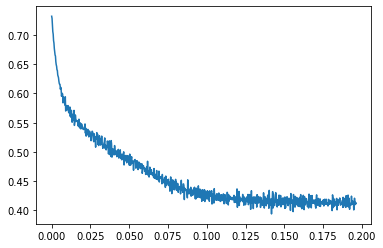

In [ ]:
y_predict = model(torch.from_numpy(test_X.astype(np.float32)))
y_pred = y_predict.detach().numpy()

# test set의 prediction값을 계산하는 식을 작성하고, weighted f1 score를 계산해주세요.
y_pred = [1.0 if x > 0.5 else 0.0 for x in y_pred]
# 답 : [1.0 if x > 0.5 else 0.0 for x in y_pred]
result = f1_score(test_Y, y_pred, average="weighted")
# 답 : f1_score(test_Y, y_pred, average="weighted")

# 결과물 출력
print("Weighted F1:", result)
step = np.linspace(0, len(loss_list), len(loss_list))
plt.plot(step/int(batch_size + 1), np.array(loss_list))